# Introducción a Matpotlib

Esto pretende ser un tutorial del módulo pyplot de la librería matplotlib. El tutorial lo dividiremos de la siguiente forma (que podrá ir cambiando a medida que vayamos avanzando).
## Index
1. **[Primeros pasos](#1.-Primeros-pasos)**

2. **[Configurando la sesión: interactividad y ventanas](#2.-Configurando-la-sesión:-interactividad-y-ventanas)**
   * [2.1 Manejando la interactividad de los gráficos](#2.1-Manejando-la-interactividad-de-los-gráficos)
   * [2.2 Utilizando Varias ventanas](#2.2-Utilizando-varias-ventanas)
   * [2.3 Modificando los parámetros por defecto](#2.3-Modificando-los-parámetros-por-defecto)

3. **[Configuración del gráfico](#3.-Configuración-del-gráfico)**
   * [3.1 Usando plt.Axes](#3.1-Usando-plt.Axes)
   * [3.2 Modificando el aspecto de los ejes](#3.2-Modificando-el-aspecto-de-los-ejes)
   * [3.3 Resaltando partes del gráfico](#3.3-Resaltando-partes-del-gráfico)
   * [3.4 Configurando el texto del gráfico](#3.4-Configurando-el-texto-del-gráfico)

4. **[Representando series de datos](#4.-Representando-series-de-datos)**
   * [4.1 plt.plot en profundidad](#4.1-plt.plot-en-profundidad)
   * [4.2 Lineas verticales con plt.stem](#4.2-Lineas-verticales-con-plt.stem)
   * [4.3 Rellenando areas entre puntos y curvas](#4.3-Rellenando-areas-entre-puntos-y-curvas)
   * [4.4 Diagramas de caja](#4.4-Diagramas-de-caja)

5. **[Gráficos de barras](#5.-Gráficos-de-barras)**
   * [5.1 Diagrama de barras](#5.1-Diagrama-de-barras)
   * [5.2 Histogramas](#5.2-Histogramas)
   * [5.3 Gráficos de escaleras](#5.3-Gráficos-de-escaleras)

6. **[Gráficos 2D](#6.-Gráficos-2D)**
   * [6.1 Scatter Plots](#6.1-Scatter-Plots)
   * [6.2 Gráficos de contorno](#6.2-Gráficos-de-contorno)
   * [6.3 Hexbin](#6.3-Hexbin)

7. **[Otros tipos de gráficos](#7.-Otros-tipos-de-gráficos)**
   * [7.1 Gráficos tipo tarta](#7.1-Gráficos-tipo-tarta)
   * [7.2 Campos vectoriales](#7.2-Campos-vectoriales)


8. **[Texto y anotaciones](#8.-Texto-y-anotaciones)**

9. **[Miscelánea](#9.-Miscelánea)**


In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

import numpy as np

## [1.](#Index) Primeros pasos

Para empezar diremos que hay tres formas de usar la librería Matplotlib:

* La podemos usar desde python usando el módulo `pylab`. El módulo `pylab` pretende mostrar un entorno de trabajo parecido al de [matlab](http://guillemborrell.es/blog/carta-abierta-a-mathworks/) mezclando las librerías numpy y matplotlib. 

Es la forma menos pythónica de usar matplotlib y se obtiene usando

Normalmente solo se recomienda para hacer pruebas rápidas desde la línea de comandos.

* Una segunda forma, que es la que veremos en este tutorial, es usando el módulo `pyplot`.

In [3]:
import matplotlib.pyplot as plt

* Por último, la forma más recomendable y pythónica, pero más compleja, sería usar `matplotlib` mediante la interfaz orientada a objetos. Cuando se programa con `matplotlib`, no mientras se trabaja interactivamente, esta es la forma que permite tener más control sobre el código. Quizá veamos esto en el futuro si alguno nos animamos/os animáis a escribir sobre ello.

Absolutamente todo lo que vamos a usar en este tutorial y que está relacionado con `matplotlib.pyplot` lo podréis encontrar documentado y detallado [aquí](http://matplotlib.sourceforge.net/api/pyplot_api.html#module-matplotlib.pyplot). Como he comentado, todo lo que vamos a ver está en el anterior enlace, pero no todo lo que está en el anterior enlace lo vamos a ver. Por ejemplo, en el índice veréis que he tachado los puntos 9 y 10, las funciones estadísticas y las funciones que permiten meter algo de interactividad en los gráficos dentro de pyplot. Las funciones estadísticas incluidas son pocas, algunas son complejas y muy específicas y las veo poco coherentes como grupo dentro de `pyplot`, para ello ya tenemos `scipy` y estas funciones estarían mejor ahí para separar lo que es ‘gráficar’ ([en español de Sudámerica existe la palabra](http://buscon.rae.es/draeI/SrvltGUIBusUsual?TIPO_HTML=2&TIPO_BUS=3&LEMA=graficar)) de lo que es analizar datos. Para interactividad con los gráficos tenemos el módulo [`matplotlib.widgets`](http://matplotlib.sourceforge.net/api/widgets_api.html#module-matplotlib.widgets), muchísimo más completo.

Para que quede claro desde un principio, las dos zonas principales donde se dibujaran cosas o sobre las que se interactuará serán:

* `figure`, que es una instancia de [`matplotlib.figure.Figure`](http://matplotlib.sourceforge.net/api/figure_api.html#matplotlib.figure.Figure). Y es la ventana donde irá el o los gráficos en sí:

![](https://pybonacci.files.wordpress.com/2012/04/pantallazo-del-2012-04-23-213736.png?w=700)

* axes, que es una instancia de [`matplotlib.axes.Axes`](http://matplotlib.sourceforge.net/api/axes_api.html#matplotlib.axes.Axes), que es el gráfico en sí donde se dibujará todo lo que le digamos y está localizada dentro de una figure.

![](https://pybonacci.files.wordpress.com/2012/04/pantallazo-del-2012-04-23-213814.png)

Para lo primero (`figure`) usaremos la palabra ‘ventana’ mientras que para lo segundo (`axes`) usaremos la palabra ‘gráfico’.

### 1.1 plt.plot

In [4]:
plt.plot?

In [60]:
import pandas as pd
df = pd.read_csv('../../data/04_01_iris.csv')
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

In [61]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [62]:
y = df["sepal_length"].values
x = df.index.values

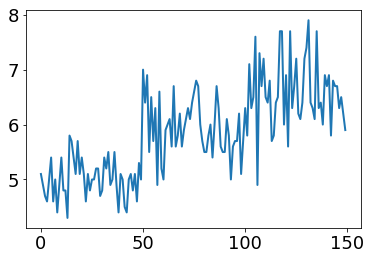

In [63]:
plt.plot(x, y)

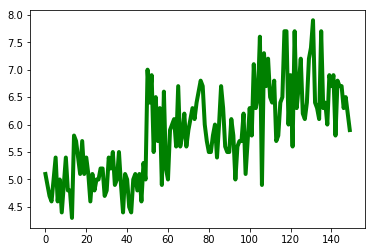

In [8]:
plt.plot(x, y, color="green", linewidth=4)

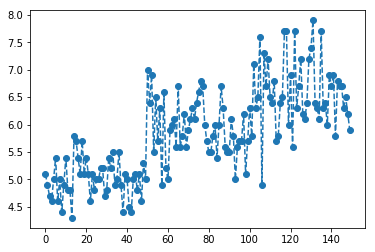

In [9]:
plt.plot(x, y, marker="o", linestyle="dashed")

# [2.](#Index) Configurando la sesión: interactividad y ventanas

[DISCLAIMER: Muchos de los gráficos que vamos a representar no tienen ningún sentido físico y los resultados solo pretenden mostrar el uso de la librería].

Como ya comentamos anteriormente, el módulo `pyplot` de `matplotlib` se suele usar para hacer pruebas rápidas desde la línea de comandos, programitas cortos o programas donde los gráficos serán, en general, sencillos.

Normalmente, cuando iniciamos la sesión, esta no está puesta en modo interactivo. En modo interactivo, cada vez que metemos código nuevo relacionado con el gráfico o la ventana (recordad, una instancia de [`matplotlib.axes.Axes`](http://matplotlib.sourceforge.net/api/axes_api.html#matplotlib.axes.Axes) o de [`matplotlib.figure.Figure`](http://matplotlib.sourceforge.net/api/figure_api.html#matplotlib.figure.Figure), respectivamente), este se actualizará. Cuando no estamos en modo interactivo, el gráfico no se actualiza hasta que llamemos a `show()` (si no hay una ventana abierta) o `draw()` (normalmente no lo usaréis para nada) explícitamente. Veamos como es esto:

Si acabamos de iniciar sesión deberíamos estar en modo interactivo (si habéis arrancado IPython con `ipython notebook --pylab inline`). Para comprobarlo hacemos lo siguiente:

### [2.1](#Index) Manejando la interactividad de los gráficos

In [10]:
plt.isinteractive()

True

Si el resultado fuera *False* significa que estamos en modo no interactivo. Esto significaría que si hacemos lo siguiente:

`plt.plot([1,2,3,4,5])`

Deberíamos llamar explicitamente a `show()` para poder visualizarlo.

`plt.show()`

Podemos conmutar a modo interactivo o no usando `plt.ion()` y `plt.ioff()`, que lo que hacen es poner el modo interactivo en ‘on’ o en ‘off’, respectivamente. Como está en on (recordad que `plt.isinteractive()` nos ha dado *True*, lo que significa que está en ‘on’), si ahora  hacemos lo siguiente  veremos como el gráfico salta de forma inmediata:

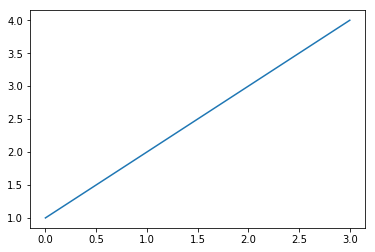

In [11]:
plt.plot([1,2,3,4])

Vemos que directamente se abre una ventana nueva sin necesidad de llamar a `plt.show()`. Yo suelo usar IPython así para ir probando cosas y cuando ya acierto con como quiero que me salgan los gráficos voy a `spyder`, donde tengo el programa que esté haciendo, y ya escribo el código que necesito con la interfaz orientada a objetos.

Jugad un poco con `plt.isinteractive()`, `plt.ion()`, `plt.ioff()`, `plt.show()` y `plt.draw()` para estar más familiarizados con el funcionamiento.

Lo siguiente que veremos es `plt.hold()` y `plt.ishold()`. `plt.hold` es un conmutador para decir si queremos que los gráficos se sobreescriban, que en el mismo gráfico tengamos diferentes gráficas representadas, o para que el gráfico se limpie y se dibuje la nueva gráfica cada vez. Si usamos `plt.ishold()` nos ‘responderá’ *True* o *False*. Si acabáis de iniciar sesión, normalmente estará en *True*.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.


True

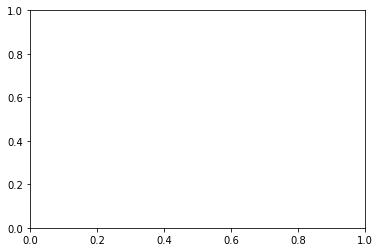

In [12]:
plt.ishold()

Como está en *True*, si hacemos lo siguiente obtendremos dos líneas sobre el mismo gráfico:

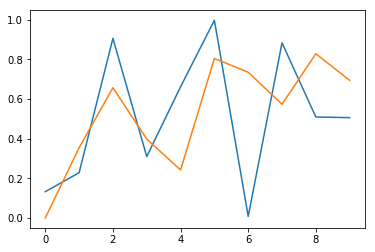

In [13]:
plt.plot(np.random.rand(10))
plt.plot(np.random.rand(10))

Si el modo `hold` estuviera en *False*, solo se habría conservado el último plot y solo veríamos una línea de las dos (probadlo usando `plt.hold()` y `plt.ishold()`).

Si estamos en modo interactivo (`plt.ion()`) y queremos borrar todos los gráficos ([matplotlib.axes.Axes](http://matplotlib.sourceforge.net/api/axes_api.html#matplotlib.axes.Axes)), títulos, …, de la ventana ([matplotlib.figure.Figure](http://matplotlib.sourceforge.net/api/axes_api.html#matplotlib.figure.Figure)) podemos usar `plt.clf()` y nos volverá a dejar el ‘lienzo’ limpio.

Si seguimos en modo interactivo (`plt.ion()`) y queremos cerrar la ventana podemos usar `plt.close()`.

Imaginaos que ahora queréis trabajar con varias ventanas de gráficos simultáneamente donde en una dibujáis unos datos y en la otra otro tipo de datos y los queréis ver simultáneamente. Podemos hacer esto dándole nombre (o número) a las ventanas con las que vamos a trabajar. Veamos un ejemplo:

### [2.2](#Index) Utilizando varias ventanas

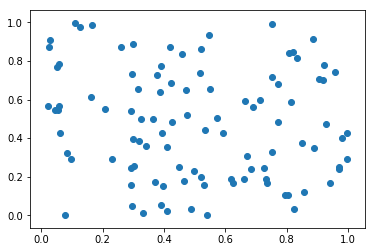

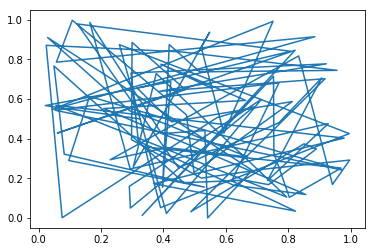

In [14]:
plt.figure('scatter') # Crea una ventana titulada 'scatter'
plt.figure('plot')    # Crea una ventana titulada 'plot'
a = np.random.rand(100) # Generamos un vector de valores aleatorios
b = np.random.rand(100) # Generamos otro vector de valores aleatorios
plt.figure('scatter') # Le decimos que la ventana activa en la que vamos a dibujar es la ventana 'scatter'
plt.scatter(a,b)  # Dibujamos un scatterplot en la ventana 'scatter'
plt.figure('plot') # Ahora cambiamos a la ventana 'plot'
plt.plot(a,b)

Es decir, podemos ir dibujando en varias ventanas a la vez. Podéis probar a cerrar una de las dos ventanas, limpiar la otra, crear una nueva,… Haciendo una llamada a `plt.figure()` también podemos definir la resolución del gráfico, el tamaño de la figura,…

Pero yo no quiero dibujar los gráficos en dos ventanas, yo quiero tener varios gráficos en la misma. Perfecto, también podemos hacer eso sin problemas con la ayuda de `plt.subplot()`. Con `plt.subplot()` podemos indicar el número de filas y columnas que corresponderán a como dividimos la ventana. En el siguiente ejemplo se puede ver dos áreas de gráfico en la misma ventana:

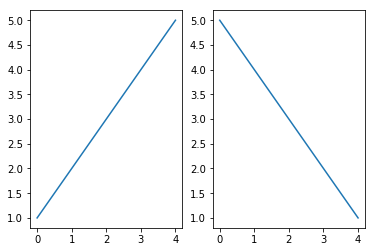

In [15]:
plt.ion()  # Nos ponemos en modo interactivo
plt.subplot(1,2,1)  # Dividimos la ventana en una fila y dos columnas y dibujamos el primer gráfico
plt.plot((1,2,3,4,5))
plt.subplot(1,2,2)  # Dividimos la ventana en una fila y dos columnas y dibujamos el segundo gráfico
plt.plot((5,4,3,2,1))

Os dejo como ejercicio ver como podéis conseguir la siguiente gráfica (si no sabéis como dejad un comentario) y con ello creo que habréis entendido perfectamente el uso de `plt.subplot()`:



### [2.3](#Index) Modificando los parámetros por defecto

Por último, vamos a ver como configurar la sesión para ahorrarnos escribir código de más. Por ejemplo, imaginaos que queréis que todas las líneas sean más gruesas por defecto porque os gustan más así, que queréis usar otro tipo de fuente sin escribirlo explícitamente cada vez que hacéis un gráfico, que los gráficos se guarden siempre con una resolución superior a la que viene por defecto,… Para ello podéis usar `plt.rc()`, `plt.rcParams`, `plt.rcdefaults()`. En este caso vamos a usar `plt.rc()`, podréis encontrar más información sobre como configurar matplotlib en [este enlace](http://matplotlib.sourceforge.net/users/customizing.html). Veamos un ejemplo para ver como funciona todo esto:

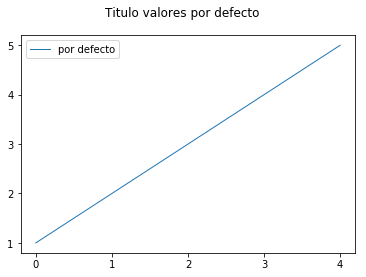

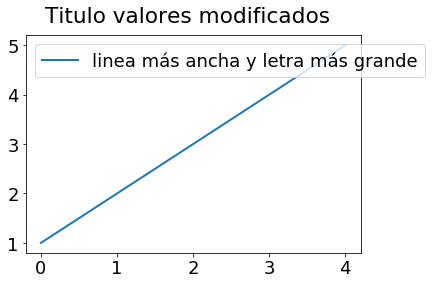

In [16]:
plt.ion()  # Nos ponemos en modo interactivo
plt.figure('valores por defecto')  # Creamos una ventana donde dibujamos el gráfico con la configuración por defecto
plt.rc('lines', linewidth = 1)  # A partir de aquí todas las líneas que dibujemos irán con ancho doble
plt.rc('font', size = 10)  # A partir de aquí las fuentes que aparezcan en cualquier gráfico en la misma sesión tendrán este tamaño
plt.suptitle('Titulo valores por defecto')  # Esto sirve para poner título dentro de la ventana
plt.plot((1,2,3,4,5), label = 'por defecto')  # Hacemos el plot
plt.legend(loc = 2)  # Colocamos la leyenda en la esquina superior izquierda

plt.rc('lines', linewidth = 2)  # A partir de aquí todas las líneas que dibujemos irán con ancho doble
plt.rc('font', size = 18)  # A partir de aquí las fuentes que aparezcan en cualquier gráfico en la misma sesión tendrán mayor tamaño
plt.figure('valores modificados')  # Creamos una ventana donde dibujamos el gráfico con la configuración por defecto
plt.suptitle('Titulo valores modificados')  # Esto sirve para poner título dentro de la ventana
plt.plot((1,2,3,4,5), label = u'linea más ancha y letra más grande')  # Hacemos el plot
plt.legend(loc = 2)  # Colocamos la leyenda en la esquina superior izquierda

Después de usar `plt.rc()` para modificar un parámetro esa modificación será para toda la sesión a no ser que lo volvamos a modificar explícitamente o a no ser que usemos `plt.rcdefaults()`, que devolverá todos los parámetros a los valores por defecto.

## [3.](#Index) Configuración del gráfico

Hasta ahora hemos visto como podemos configurar la ventana y la sesión, en esta ocasión nos vamos a centrar en configurar el área del gráfico. Para ello vamos a empezar con `plt.axes()`, que sirve para 'llamar' y/o configurar a un área de gráfico. Podemos definir la posición, el tamaño, el color del área del fondo,…:

### [3.1](#Index) Usando plt.Axes

In [17]:
plt.axes?

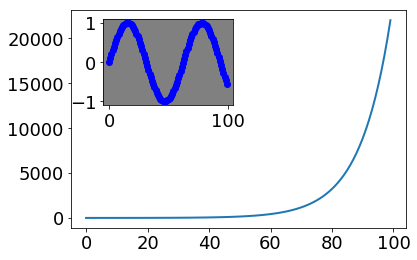

In [18]:
plt.axes()  # Coloca un área de gráfico con los valores por defecto
plt.plot(np.exp(np.linspace(0,10,100)))  # Dibuja una exponencial de 0 a 10
plt.axes([0.2,0.55,0.3,0.3], facecolor="grey", frameon=True)
plt.cla()#.set_facecolor('grey')  # Dibuja una nueva área de gráfica colocada y con ancho y largo definido por [0.2,0.55,0.3,0.3] y con gris como color de fondo
plt.plot(np.sin(np.linspace(0,10,100)), 'b-o', linewidth = 2)

Como podéis imaginar, podemos usar `plt.axes()` como sustituto de `plt.subplot()` si queremos dibujar gráficos que no tengan que tener una forma 'regular' dentro de la ventana. Si ahora queremos borrar el área del gráfico podemos usar `plt.delaxes()`, si queremos borrar el contenido que hay en el área del gráfico podemos usar `plt.cla()` y si queremos que no aparezca la ‘caja’ donde se dibuja el gráfico podemos usar `plt.box()` (si no hay 'caja' y queremos que aparezca podemos llamar a `plt.box()` y volverá a aparecer la 'caja').

![](https://pybonacci.files.wordpress.com/2012/05/concaja.png) ![](https://pybonacci.files.wordpress.com/2012/05/sincaja.png)


### [3.2](#Index) Modificando el aspecto de los ejes


El área del gráfico puede ser un área rectangular o un área para [un gráfico polar (ver ejemplo)](http://pybonacci.wordpress.com/2012/03/24/dibujando-una-rosa-de-frecuencias/).

Podemos colocar una rejilla que nos ayude a identificar mejor las áreas del gráfico mediante `plt.grid()` (en un gráfico polar deberemos usar `plt.rgrid()` y `plt.thetagrids()`).

Si os habéis fijado, `matplotlib` dibuja los ejes de forma que se ajusten al gráfico pero quizá eso no es lo que nos interese en algunos momentos, para ello podemos hacer uso de `plt.axis()`. Nos permite definir la longitud de los ejes, si queremos que aparezcan los mismos, si queremos que estos estén escalados,… Si solo nos interesa configurar uno de los ejes y dejar que el otro lo maneje `matplotlib` podemos usar `plt.xlim()`, `plt.xscale()`, `plt.ylim()` y `plt.yscale()`. Si queremos dejar el eje x o el eje y con escala logarítmica podemos usar, respectivamente, `plt.semilogx()` o `plt.semilogy()`. Podemos dibujar un segundo eje x o un segundo eje y usando `plt.twinx()` o `plt.twiny`, respectivamente. También podemos establecer unos márgenes alrededor de los límites de los ejes usando `plt.margins()`. Por último, podemos etiquetar nuestros ejes con `plt.xlabel()` y `plt.ylabel()`. Veamos un ejemplo de algunas de estas cosas:

(-10, 110)

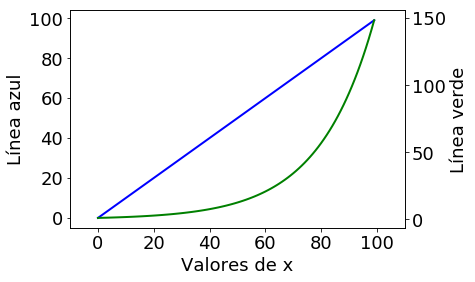

In [19]:
plt.plot(np.arange(100), 'b')  # Dibujamos una línea recta azul
plt.xlabel('Valores de x')  # Ponemos etiqueta al eje x
plt.ylabel(u'Línea azul')  # Ponemos etiqueta al eje y
plt.twinx()  # Creamos un segundo eje y
plt.plot(np.exp(np.linspace(0,5,100)), 'g')  # Dibuja una exponencial de 0 a 5 con la y representada en el segundo eje y
plt.ylabel(u'Línea verde')  # Ponemos etiqueta al segundo eje y
plt.xlim(-10,110)  # Limitamos los valores del eje x para que vayan desde -10 a 110

### [3.3](#Index) Resaltando partes del gráfico

Ahora vamos a ver `plt.axvline()`, `plt.axvspan()`, `plt.axhline()`, `plt.axhspan()`. ¿Y para qué sirven estas 'cosas'? Pensad que, por ejemplo, queréis resaltar una zona de vuestro gráfico para focalizar la atención en esa área. Eso lo podríamos hacer usando lo anterior. `plt.axvline()` y `plt.axhline()` dibujan líneas verticales y horizontales en la x o en la y que le digamos mientras que `plt.axvspan` y `plt.axhspan` dibujan recuadros entre las coordenadas x o y que queramos, respectivamente.

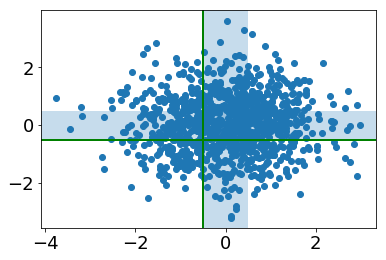

In [20]:
plt.scatter(np.random.randn(1000), np.random.randn(1000))  # Dibujamos un scatterplot de valores aleatorios
plt.axvline(-0.5, color = 'g')  # Dibujamos una línea vertical verde centrada en x = -0.5
plt.axvline(-0.5, color = 'g')  # Dibujamos una línea vertical verde centrada en x = 0.5
plt.axhline(-0.5, color = 'g')  # Dibujamos una línea horizontal verde centrada en x = -0.5
plt.axhline(-0.5, color = 'g')  # Dibujamos una línea horizontal verde centrada en x = 0.5
plt.axvspan(-0.5,0.5, alpha = 0.25)  #  Dibujamos un recuadro azul vertical entre x[-0.5,0.5] con transparencia 0.25
plt.axhspan(-0.5,0.5, alpha = 0.25)  #  Dibujamos un recuadro azul horizontal entre x[-0.5,0.5] con transparencia 0.25

### [3.4](#Index) Configurando el texto del gráfico

¿Y como podemos controlar el texto básico sobre el gráfico? Hay muchas formas de meter texto y controlar las etiquetas de forma básica y sencilla. En algunos momentos hemos visto `plt.legend()`, también existe `plt.figlegend()`. Yo siempre uso `plt.legend()` el 100% de las veces. Para usos avanzados podéis mirar [este enlace](http://stackoverflow.com/a/4701285) y este [otro enlace](http://matplotlib.sourceforge.net/users/legend_guide.html). Si queremos poner un título al gráfico podemos usar `plt.title()` y `plt.suptitle()`. Si queremos poner título a los ejes podemos usar `plt.xlabel()` y `plt.ylabel()` para los ejes x e y, respectivamente. Por último, para controlar los valores de las etiquetas que se ponen sobre los ejes dispones de `plt.locator_params()`, `plt.minorticks_on()`, `plt.minorticks_off()`, `plt.tick_params()`, `plt.tick_label_format()`, `plt.xticks()` y `plt.yticks()`. Vamos a manejar la mayor parte de estas funciones mediante un ejemplo para que se vea más claro su uso. Imaginemos que queremos representar el valor medio diario de una variable durante un año, en el eje x queremos que aparezca solo los meses en el día del año en que empieza el mes.

Text(0,0.5,'Media diaria')

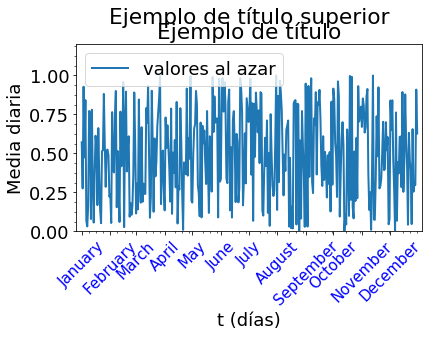

In [21]:
import calendar
dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(12)+1]  # Para generar el lugar del primer días de cada mes en un año
meses = calendar.month_name[1:13]  # Creamos una lista con los nombres de los meses
plt.axes([0.1,0.2,0.8,0.65])
plt.plot(np.arange(1,366), np.random.rand(365), label = 'valores al azar')  # Creamos un plot con 365 valores
plt.xlim(-5,370)  # Los valores del eje y variarán entre -5 y 370
plt.ylim(0,1.2)  # Los valores del eje y variarán entre 0 y 1.2
plt.legend()  # Creamos la caja con la leyenda
plt.title(u'Ejemplo de título')  # Ponemos un título
plt.suptitle(u'Ejemplo de título superior')  # Ponemos un título superior
plt.minorticks_on()  # Pedimos que se vean subrrayas de división en los ejes
plt.xticks(dias, meses, size = 'small', color = 'b', rotation = 45)  # Colocamos las etiquetas, meses, en las posiciones, dias, con color azul y rotadas 45º
plt.xlabel(u't (días)')
plt.ylabel('Media diaria')

## [4.](#Index) Representando series de datos

Hasta ahora hemos visto como configurar las ventanas, manejo de las mismas, definir áreas de gráfico,… Ahora vamos a ir viendo los diferentes tipos de gráficos que existen.

### [4.1](#Index) plt.plot en profundidad

Como habéis podido comprobar, en los ejemplos anteriores hemos estado viendo mucho `plt.plot()` que es lo que se suele usar para dibujar un gráfico simple de líneas representando los valores (x, f(x)). Ahora vamos a ver un ejemplo explicado para que veáis todas las posibilidades de `plt.plot()`.

Text(0,0.5,'valores f(x)')

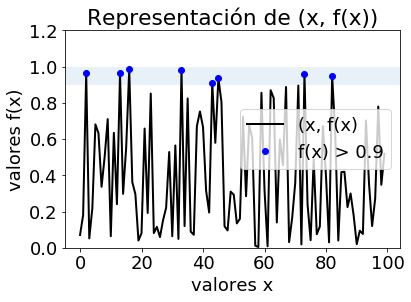

In [137]:
x = np.arange(100)  # Valores de x
y = np.random.rand(100)  # Valores de y
plt.plot(x,y, color = 'black', label = '(x, f(x)')  # Dibujamos la evolución de f(x), frente a x
plt.plot(x[y > 0.9], y[y > 0.9], 'bo', label = 'f(x) > 0.9')  # Destacamos los valores por encima de 0.9 colocándoles un marcador circular azul
plt.axhspan(0.9, 1, alpha = 0.1)  # Colocamos una banda de color para los valores f(x) > 0.9
plt.ylim(0,1.2)  # Limitamos el eje x
plt.legend()  # Colocamos la leyenda
plt.title(u'Representación de (x, f(x))')  # Colocamos el título del gráfico
plt.xlabel('valores x')  # Colocamos la etiqueta en el eje x
plt.ylabel('valores f(x)')  # Colocamos la etiqueta en el eje y

Este es el tipo de gráfico que suelo usar un 75% de las veces. Tipos de gráfico análogos a este son `plt.plot_date()`, que es similar a `plt.plot()` considerando uno o ambos ejes como fechas, y `plt.plotfile()`, que dibuja directamente desde los datos de un fichero.

### Ejercicio: Dibuja las longitudes de los pétalos

Vamos a poner en práctica lo aprendido hasta ahora representando las longitudes de lós petalos de las diferentes especies de iris. Para ello seleccionaremos del dataframe los valores de la longitud del pétalo para cada especie:

In [142]:
y_total = df["petal_length"].values
x_total = df.index.values

setosa = df[df["species"] == "setosa"]["petal_length"].values
set_ix = df[df["species"] == "setosa"]["petal_length"].index.values

versicolor = df[df["species"] == "versicolor"]["petal_length"].values
versicolor_ix = df[df["species"] == "versicolor"]["petal_length"].index.values

virginica = df[df["species"] == "virginica"]["petal_length"].values
virginica_ix = df[df["species"] == "virginica"]["petal_length"].index.values

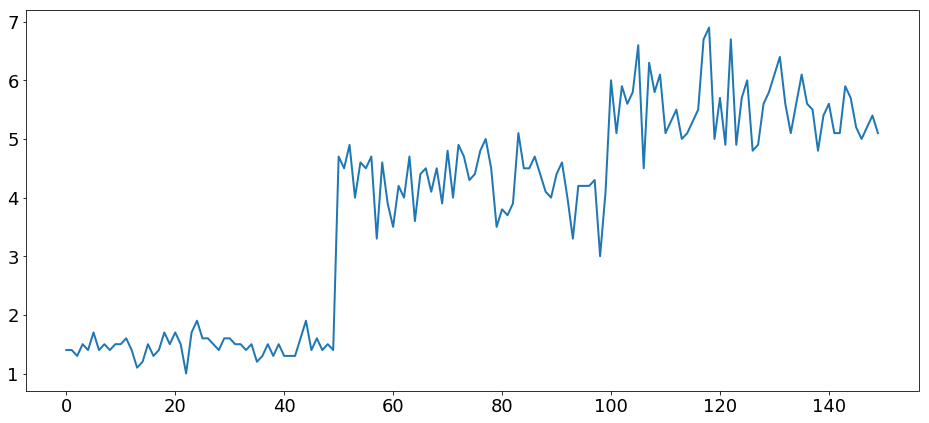

In [146]:
plt.figure(figsize=(16,7))
plt.plot(x_total,y_total)

Text(0,0.5,'Longitud del pétalo (cm)')

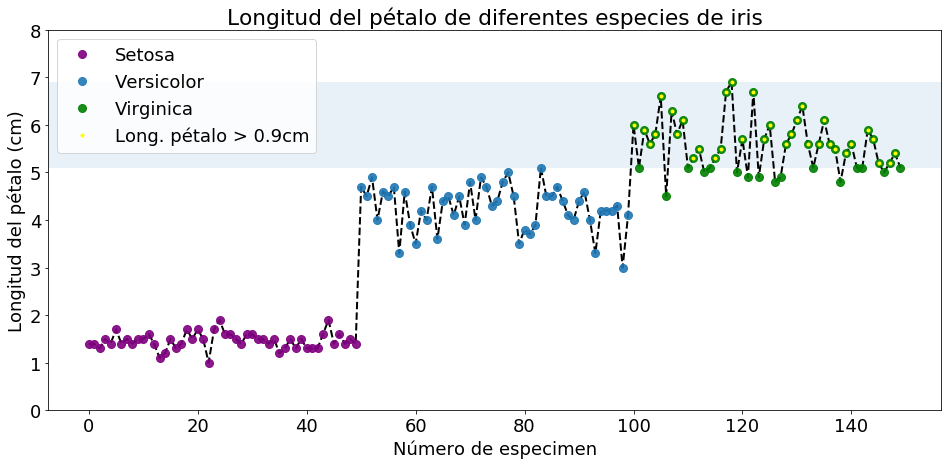

In [143]:
plt.figure(figsize=(16,7))
plt.plot(x_total,y_total, color = 'black', label = '', linestyle="dashed", marker="")  # Dibujamos la evolución de f(x), frente a x

plt.plot(set_ix, setosa, label = 'Setosa', linestyle="", marker="o", markersize=8, alpha=0.9, color="purple")
plt.plot(versicolor_ix, versicolor, label = 'Versicolor', linestyle="", marker="o", markersize=8, alpha=0.9)
plt.plot(virginica_ix, virginica, label = 'Virginica', linestyle="", marker="o", markersize=8, alpha=0.9, color="green")


plt.plot(x_total[y_total > 5.1], y_total[y_total > 5.1],
         'bo', label = 'Long. pétalo > 0.9cm', markersize=3, color="yellow")  # Destacamos los valores por encima de 0.9 colocándoles un marcador circular azul

plt.axhspan(5.1, 6.9, alpha = 0.1)  # Colocamos una banda de color para los valores f(x) > 0.9
plt.ylim(0,8)  # Limitamos el eje x
plt.legend(loc="upper left")  # Colocamos la leyenda
plt.title(u'Longitud del pétalo de diferentes especies de iris')  # Colocamos el título del gráfico
plt.xlabel('Número de especimen')  # Colocamos la etiqueta en el eje x
plt.ylabel('Longitud del pétalo (cm)')  # Colocamos la etiqueta en el eje y

### [4.2](#Index) Lineas verticales con plt.stem

Otro tipo de gráfico sería el que podemos obtener con `plt.stem()`. Dibuja líneas verticales desde una línea base. Imaginaros, por ejemplo, que tenéis una serie temporal, la normalizamos (restándole su media y dividiendo por su desviación estándar) de forma que nos queda una serie de media 0 y desviación estándar 1. Esta nueva serie la podemos representar con `plt.stem()` donde la línea horizontal sería el valor medio (en este caso la media sería 0, recuerda que la hemos normalizado la serie) y las líneas verticales sería lo que se desvía el valor individual respecto de la media de la serie. Vamos a ver un ejemplo con los valores por encima de la media en verde y los valores por debajo de la media en rojo.

Text(0,0.5,'valores f(x)')

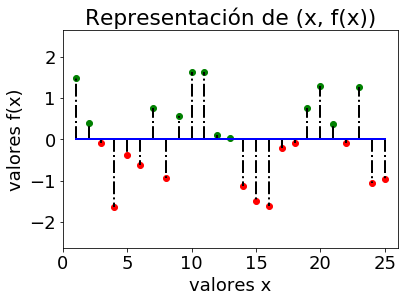

In [46]:
x = np.arange(25) + 1  # Valores de x
y = np.random.rand(25) * 10.  # Valores de y
y_norm = (y - y.mean()) / y.std()  # Valores de y normalizados. Esta nueva serie tiene media 0 y desvicación estándar 1 (comprobadlo como ejercicio)
plt.xlim(np.min(x) - 1, np.max(x) + 1)  # Colocamos los límites del eje x
plt.ylim(np.min(y_norm)-1, np.max(y_norm)+1)  # Colocamos los límites del eje y
plt.stem(x[y_norm > 0],y_norm[y_norm > 0], linefmt='k-.', markerfmt='go', basefmt='b-')  # Dibujamos los valores por encima de la media
plt.stem(x[y_norm < 0],y_norm[y_norm < 0], linefmt='k-.', markerfmt='ro', basefmt='b-')  # Dibujamos los valores por debajo de la media
plt.title(u'Representación de (x, f(x))')  # Colocamos el título del gráfico
plt.xlabel('valores x')  # Colocamos la etiqueta en el eje x
plt.ylabel('valores f(x)')  # Colocamos la etiqueta en el eje y

In [47]:
x = df[]
y = np.random.rand(25) * 10.  # Valores de y


In [ ]:
y_norm = (y - y.mean()) / y.std()  # Valores de y normalizados. Esta nueva serie tiene media 0 y desvicación estándar 1 (comprobadlo como ejercicio)
plt.xlim(np.min(x) - 1, np.max(x) + 1)  # Colocamos los límites del eje x
plt.ylim(np.min(y_norm)-1, np.max(y_norm)+1)  # Colocamos los límites del eje y
plt.stem(x[y_norm > 0],y_norm[y_norm > 0], linefmt='k-.', markerfmt='go', basefmt='b-')  # Dibujamos los valores por encima de la media
plt.stem(x[y_norm < 0],y_norm[y_norm < 0], linefmt='k-.', markerfmt='ro', basefmt='b-')  # Dibujamos los valores por debajo de la media
plt.title(u'Representación de (x, f(x))')  # Colocamos el título del gráfico
plt.xlabel('valores x')  # Colocamos la etiqueta en el eje x
plt.ylabel('valores f(x)')  # Colocamos la etiqueta en el eje y

### [4.3](#Index) Rellenando areas entre puntos y curvas

En algunos casos, nos interesa ver cuando una serie está por encima o por debajo de la otra. Eso, con un gráfico tipo `plt.plot()` lo podemos hacer sin problemas, pero nos gustaría resaltarlo visualmente de forma sencilla. Para ello podemos usar `plt.fill_between()`. Imaginemos un ejemplo donde tenemos dos series temporales y queremos localizar fácilmente cuando la primera está por encima de la segunda y cuando está por debajo.

Text(0,0.5,'valores y')

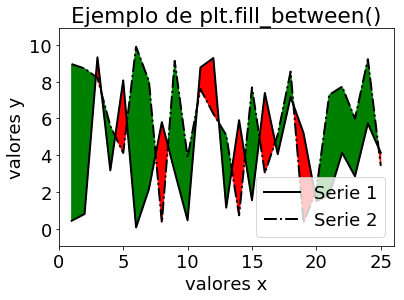

In [24]:
x = np.arange(25) + 1  # Valores de x
y1 = np.random.rand(25) * 10.  # Valores de y1
y2 = np.random.rand(25) * 10.  # Valores de y2
plt.xlim(np.min(x) - 1, np.max(x) + 1)  # Colocamos los límites del eje x
plt.ylim(np.min([y1, y2])-1, np.max([y1, y2])+1)  # Colocamos los límites del eje y
plt.plot(x, y1, 'k-', linewidth = 2, label = 'Serie 1')  # Dibujamos los valores de (x,y1) con una línea contínua
plt.plot(x, y2, 'k-.', linewidth = 2, label = 'Serie 2')  # Dibujamos los valores de (x,y2) con una línea de punto y raya
plt.fill_between(x, y1, y2, where = (y1 < y2), color = 'g', interpolate = True)  # Pinta polígonos color verde entre las líneas cuando y1 < y2 
plt.fill_between(x, y1, y2, where = (y1 > y2), color = 'r', interpolate = True)  # Pinta polígonos color rojo entre las líneas cuando y1 > y2
plt.legend()
plt.title('Ejemplo de plt.fill_between()')  # Colocamos el título del gráfico
plt.xlabel('valores x')  # Colocamos la etiqueta en el eje x
plt.ylabel('valores y')  # Colocamos la etiqueta en el eje y

Recordad que usamos valores aleatorios para y1 e y2 por lo que si usáis ese código no os tiene porque dar lo mismo. Como veis, cuando los valores de y2 son mayores que los de y1 dibuja polígonos verdes, en caso contrario dibuja polígonos rojos. Algo parecido pero para el eje y en lugar de para el eje x lo podemos hacer usando `plt.fill_betweenx()`. También podemos dibujar el polígono que queramos sobre el gráfico usando `plt.fill()`. Veamos una ‘ki-cutrez’ usando `plt.fill()`:

(0.1, 2)

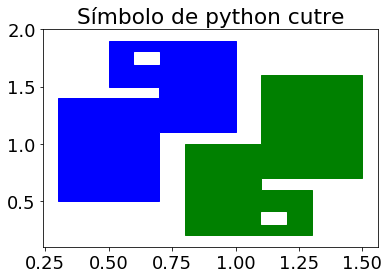

In [25]:
s1x = [0.3,0.3,0.7,0.7,0.5,0.5,1,1,0.7,0.7]
s1y = [0.5,1.4,1.4,1.5,1.5,1.9,1.9,1.1,1.1,0.5]
o1x = [0.6,0.6,0.7,0.7]
o1y = [1.7,1.8,1.8,1.7]
s2x = [0.8,0.8,1.1,1.1,1.5,1.5,1.1,1.1,1.3,1.3]
s2y = [0.2,1,1,1.6,1.6,0.7,0.7,0.6,0.6,0.2]
o2x = [1.1,1.1,1.2,1.2]
o2y = [0.3,0.4,0.4,0.3]
plt.fill(s1x, s1y, color = 'b')
plt.fill(o1x,o1y, color = 'w')
plt.fill(s2x, s2y, color = 'g')
plt.fill(o2x,o2y, color = 'w')
plt.title(u'Símbolo de python cutre')
plt.ylim(0.1,2)

### [4.4](#Index) Diagramas de caja

Y ya, lo último que vamos a ver hoy es un diagrama de caja-bigote (*box plot* o *box-whisker diagram*). Este es un diagrama donde se puede ver un resumen de una serie de forma rápida y sencilla. En él se representa el primer cuartil y el tercer cuartil, que son los extremos de la caja, el valor de la mediana (o segundo cuartil), que se representa mediante una línea dentro de la caja, y los extremos de la serie que no se consideran anómalos, los llamados 'bigotes', que son los valores extremos que están dentro del rango de 1.5 veces el rango intercuartílico (IQR por sus siglas en inglés, *Inter Quartil Range*). Los valores que quedan fuera de este rango que definamos, que como hemos comentado suele ser 1.5xIQR, se consideran valores anómalos u 'outliers' y se representan como puntos fuera de los bigotes. Por tanto, imaginemos que estamos representando la altura de las mujeres que viven en España, las mujeres que viven en Alemania y las mujeres que viven en Tailandia. Con un diagrama de caja-bigote podemos ver rápidamente como se distribuyen cada uno de estos conjuntos de datos y podemos compararlos visualmente entre ellos.

Text(0,0.5,'Altura (cm)')

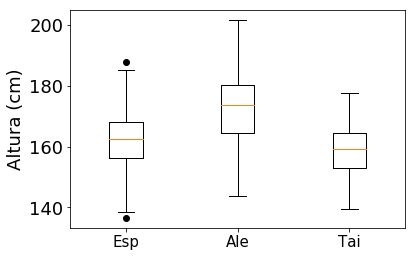

In [26]:
alt_esp = np.random.randn(100)+165 + np.random.randn(100) * 10  # Creamos unos valores para la altura de 100 españolas
alt_ale = np.random.randn(100)+172 + np.random.randn(100) * 12  # Creamos unos valores para la altura de 100 alemanas
alt_tai = np.random.randn(100)+159 + np.random.randn(100) * 9   # Creamos unos valores para la altura de 100 tailandesas
plt.boxplot([alt_esp, alt_ale, alt_tai], sym = 'ko', whis = 1.5)  # El valor por defecto para los bigotes es 1.5*IQR pero lo escribimos explícitamente
plt.xticks([1,2,3], ['Esp', 'Ale', 'Tai'], size = 'small', color = 'k')  # Colocamos las etiquetas para cada distribución
plt.ylabel(u'Altura (cm)')

[TODO ESTE COMENTARIO ES PARA COMENTAR EL GRÁFICO, CUALQUIER PARECIDO CON LA REALIDAD SERÍA MUY RARUNO Y HABRÍA QUE LLAMAR A [FRIKER JIMÉNEZ](http://www.frikipedia.es/friki/Iker_Jim%C3%A9nez)] 

Vemos como las alemanas presentan alturas superiores y las tailandesas son las que, en general, mostrarían alturas inferiores. En las alemanas hay algunas mujeres que quedan por encima de lo que hemos considerado como valores normales llegando a alturas por encima de los 200 cm. Las españolas se encontrarían entre unas alturas de unos 140 cm y unos 190 cm.

## [5.](#Index) Gráficos de barras

Hasta ahora hemos visto como configurar las ventanas, manejo de las mismas, definir áreas de gráfico, algunos tipos de gráficos… Ahora vamos a continuar viendo tipos de gráficos disponibles desde `matplotlib.pyplot`. En este caso nos vamos a centrar en los gráficos de barras.

### [5.1](#Index) Diagrama de barras

Si en lugar de dibujar histogramas queremos dibujar gráficos de barras para representar, que se yo, la evolución de la prima de riesgo en los últimos días podemos usar `plt.bar`.

([<matplotlib.axis.XTick at 0x7fa658860d68>,
 <a list of 5 Text xticklabel objects>)

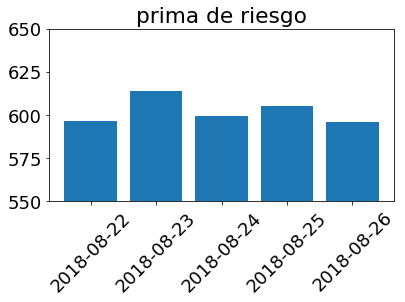

In [27]:
import datetime as dt  # Importamos el módulo datetime
prima = 600 + np.random.randn(5) * 10  # Valores inventados para la prima de riesgo
fechas = (dt.date.today() - dt.timedelta(5)) + dt.timedelta(1) * np.arange(5) # generamos las fechas de los últimos cinco días
plt.axes((0.1, 0.3, 0.8, 0.6))  # Definimos la posición de los ejes
plt.bar(np.arange(5), prima)  # Dibujamos el gráfico de barras
plt.ylim(550,650)  # Limitamos los valores del eje y al range definido [450, 550]
plt.title('prima de riesgo')  # Colocamos el título
plt.xticks(np.arange(5), fechas, rotation = 45)  # Colocamos las etiquetas del eje x, en este caso, las fechas

Si las barras las queréis dibujar en dirección horizontal en lugar de vertical podéis echarle un ojo a `matplotlib.pyplot.barh`. Siguiendo con los gráficos de barras vamos a ver un caso un poco más especial haciendo uso de `matplotlib.pyplot.broken_barh`. Queremos representar el tipo de nubosidad que ha habido en un día concreto para saber cuando juanlu ha podido mirar las estrellas con su telescopio. El tipo de nubosidad lo vamos a desglosar en nubes bajas, medias y altas. Además de poder ver que juanlu no ha podido usar su telescopio más que para mirar a la piscina de los vecinos porque el cielo estaba tapado, obtendríamos un resultado como este:

Text(0.5,0,'t(h)')

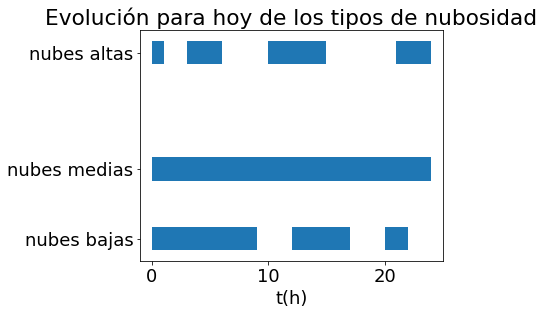

In [28]:
plt.axes((0.2,0.1,0.7,0.8))  # Creamos los ejes en la posición que queremos
plt.title(u'Evolución para hoy de los tipos de nubosidad')  # Ponemos un título al gráfico
plt.broken_barh([(0,1),(3,3), (10,5), (21,3)], (9500, 1000))  # Dibujamos los momentos en que ha habido nubes altas
plt.broken_barh([(0,24)], (4500, 1000))  # Dibujamos los momentos en que ha habido nubes medias
plt.broken_barh([(0,9), (12,5), (20,2)], (1500, 1000))  # Dibujamos los momentos en que ha habido nubes bajas
plt.xlim(-1,25)  # Limitamos el rango de valores del eje x
plt.yticks([2000, 5000, 10000], ['nubes bajas', 'nubes medias','nubes altas'])  # Colocamos etiquetas en el eje y
plt.xlabel('t(h)')  # Y finalmente ponemos un título al eje x, el eje de tiempos

En `plt.broken_barh` se define primero los valores de x donde irá una barra y la longitud de esta barra y luego se pone el rango de valores de y para todas las barras definidas en x (además de poder cambiar colores y demás de las barras):

`plt.broken_barh([(x0+longitud para la barra que empieza en x0), (x1+ longitud para la barra que empieza en x1), ..., (tantos x como queramos)], (valor mínimo del rango para y, longitud del rango de y desde el y mínimo), demás etiquetas que queramos incluir)`

Por último para hoy y siguiendo con los gráficos de barras vamos a ver `plt.step`. Esta función nos permite dibujar un gráfico de ‘escaleras’. Viendo esto en acción entenderéis mejor a lo que me refiero:

### [5.2](#Index) Histogramas

Para dibujar un [histograma](http://es.wikipedia.org/wiki/Histograma) podemos hacer uso de `plt.hist`. Un histograma suele ser un gráfico de barras donde se representa la ocurrencia de datos (frecuencia) en intervalos definidos. Lo que hace `plt.hist` es dibujar el histograma de un vector en función del número de intervalos (*bins*) que definamos. Como siempre, vamos a ver esto con un ejemplo de código a continuación. El resultado sería el siguiente, donde se representa el cálculo que haría la función [`np.histogram`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) gráficamente y en un solo paso:

(array([   2.,    9.,   24.,   68.,  190.,  342.,  581.,  903., 1154.,
        1374., 1466., 1304., 1079.,  683.,  428.,  214.,  119.,   36.,
          15.,    9.]),
 array([-3.75631248, -3.38827338, -3.02023429, -2.6521952 , -2.28415611,
        -1.91611702, -1.54807793, -1.18003884, -0.81199975, -0.44396065,
        -0.07592156,  0.29211753,  0.66015662,  1.02819571,  1.3962348 ,
         1.76427389,  2.13231298,  2.50035208,  2.86839117,  3.23643026,
         3.60446935]),
 <a list of 20 Patch objects>)

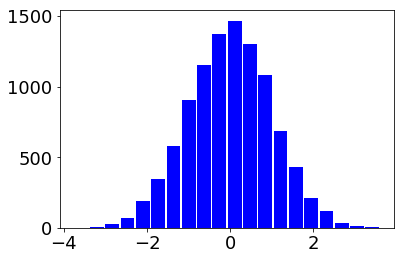

In [29]:
x = np.random.randn(10000)  # Definimos un vector de números aleatorios de una distribución normal
plt.hist(x, bins = 20, rwidth=0.9, histtype="barstacked", linewidth=1, color="blue")  # Dibuja un histograma dividiendo el vector x en 20 intervalos del mismo ancho

In [30]:
plt.hist?

Podéis jugar también con [`np.histogram2d`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html#numpy.histogram2d), [`np.histogramdd`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogramdd.html#numpy.histogramdd) y [`np.bincount`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.bincount.html#numpy.bincount)

### [5.3](#Index) Gráficos de escaleras

(0, 11)

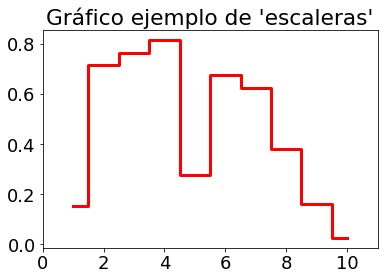

In [31]:
x = np.arange(10) + 1
y = np.random.rand(10)
plt.step(x, y, where = 'mid', color = 'r', linewidth = 3)
plt.title(u"Gráfico ejemplo de \'escaleras\'")
plt.xlim(0,11)

## [6.](#Index) Gráficos 2D

### [6.1](#Index) Scatter Plots

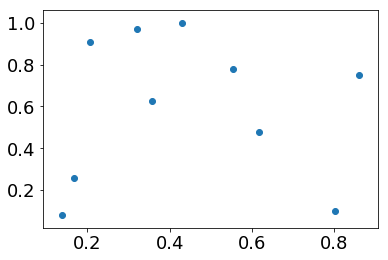

In [32]:
x = np.random.rand(10)
y = np.random.rand(10)

plt.scatter(x, y)

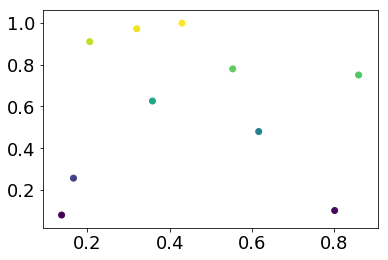

In [33]:
plt.scatter(x, y, c=y)

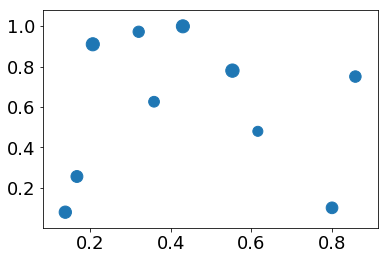

In [34]:
s = np.random.rand(10)*200

plt.scatter(x, y, s = s)

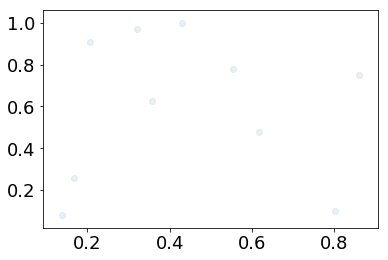

In [35]:
plt.scatter(x, y, alpha=0.1)

### [6.2](#Index) Gráficos de contorno

Como ya hemos comentado anteriormente, ejemplos de gráficos de contornos ya hemos visto varios. Esos gráficos de contornos se hacen a partir de datos de mallas regulares. Pero, ¿qué sucede si tenemos datos que están repartidos de forma irregular? En este caso podemos hacer uso de `plt.tricontour` y de `plt.tricontourf`. Existen unas pocas diferencias de uso con respecto a `plt.contour` y `plt.contourf`. En este caso, el valor de Z no tiene que ser 2D. Para ver su funcionamiento pensemos en un caso real. Imaginad que tenéis una red de medidas (por ejemplo, temperaturas) repartidas geográficamente en una zona (AVISO, como siempre, los datos que vamos a representar no tienen ningún sentido físico ni pretender representar una situación real y solo se usan para ver el funcionamiento de `tricontour` y `tricontourf`, en este caso). Se ha usado `plt.scatter` para representar la posición de las estaciones de medida:

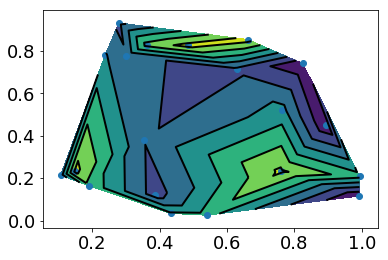

In [36]:
x = np.random.rand(20)  # posiciones X de nuestra red de medidas
y = np.random.rand(20)  # posiciones Y de nuestra red de medidas
t = np.random.rand(20)*3000  # valores de Temperatura (ºK) en las posiciones (X, Y)
plt.tricontourf(x, y, t)  # Pintamos las triangulaciones con contornos de color
plt.tricontour(x, y, t, colors = 'k')  # Pintamos las líneas de contorno en color negro
plt.scatter(x, y)  # Pintamos la posición de las estaciones de medida.

Por defecto usa una [triangulación de Delaunay](http://es.wikipedia.org/wiki/Triangulaci%C3%B3n_de_Delaunay) pero se puede definir la triangulación que queramos haciendo uso de `matplotlib.tri.triangulation`.

Todo esto está metido dentro del paquete `matplotlib.tri`, donde también podréis encontrar `tripcolor` y  `triplot`. Probad con todo ello y mandadnos ejemplos para saber como lo usáis y aprender.

También podemos dibujar cuadros de valores que correspondan a una matriz en lugar de interpolar los valores mediante contornos. Puede suceder que, en muchos casos, el número de datos que tengamos en una malla regular sea bajo y una interpolación (usando `contour`, por ejemplo) dé resultados que pueden quedar feos y no representan fielmente lo que queremos representar. En esos casos podemos usar `plt.matshow`, que lo que hace es dibujar una matriz con cuadros de colores en función del valor de cada uno de los elementos de la matriz. Vamos a hacer otro ejemplo para que se entienda mejor. El resultado lo podemos ver en el siguiente ejemplo. En la imagen de la izquierda vemos que las líneas de contorno, en este caso, quedan mal en los bordes y la representación solo usando `matshow` (imagen de la derecha) sería más adecuada (repito, todos los ejemplos no tienen más sentido que el de explicar el uso de `matplotlib.pyplot`).

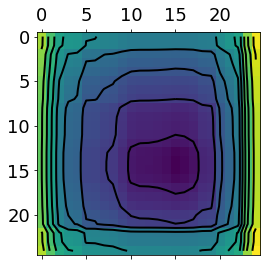

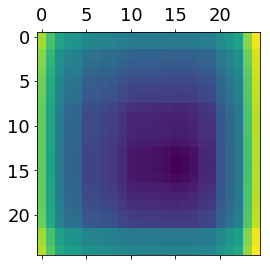

In [37]:
x = np.sort(np.random.randn(25))  # Valores de x que vamos a usar posteriormente para crear la matriz
y = np.sort(np.random.randn(25))  # Valores de y que vamos a usar posteriormente para crear la matriz
mat1, mat2 = np.meshgrid(x, y)  # Creamos dos matrices cuadradas que vamos a cruzar
mat = np.sqrt( mat1**2 + mat2 **2)  # Creamos una matriz final a partir de las dos anteriores
plt.matshow(mat)  # Representamos la última matriz con matshow
plt.contour(np.arange(25), np.arange(25), mat, 10, colors = 'k')  # Colocamos líneas de contorno para la matriz mat
plt.matshow(mat)  # Representamos la última matriz con matshow

Podéis echarle un ojo a `plt.pcolor`, `plt.pcolomesh` y `plt.tripcolor` que permiten hacer cosas similares a estas.

### [6.3](#Index) Hexbin

`plt.hexbin` hace algo parecido a lo anterior pero teniendo en cuenta la ocurrencia en los intervalos que determinemos (esto mismo lo podemos hacer, por ejemplo, con `plt.matshow` aunque tendremos que calcular previamente las frecuencias para cada recuadro). Vamos a representar el número de veces que los valores de dos series (x e y) se encuentran en determinado intervalo de datos. Para ello vamos a recurrir, como siempre, a `np.random.randn`:

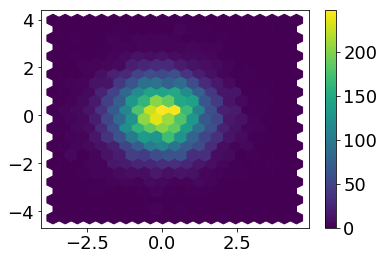

In [38]:
x = np.random.randn(10000)  # Creamos un vector de 10000 elementos distribuidos de forma normal
y = np.random.randn(10000)  # Creamos un vector de 10000 elementos distribuidos de forma normal
plt.hexbin(x,y, gridsize = 20)  # Representamos como están distribuidos bidimensionalmente con ayuda de hexbin, en este caso definimos un tamaño del grid de 20 (esto se puede elegir como se prefiera)
plt.colorbar()  # Colocamos una barra de colores para saber a qué valor corresponden los colores

Los colores los hemos colocado de forma aleatoria solo definiendo ocho colores.

## [7.](#Index) Otros tipos de gráficos

Hasta ahora hemos visto como configurar las ventanas, manejo de las mismas, definir áreas de gráfico, algunos tipos de gráficos… Ahora vamos a continuar viendo tipos de gráficos disponibles desde `matplotlib.pyplot`. En este caso nos vamos a centrar en otros gráficos que, quizá, sean menos usados que los vistos hasta ahora. Algunos ya los hemos visto en otras entradas, como [gráficos polares](http://pybonacci.wordpress.com/2012/03/24/dibujando-una-rosa-de-frecuencias/), gráficos de contornos [[1]](http://pybonacci.wordpress.com/2012/04/13/dibujando-lineas-de-nivel-en-python-con-matplotlib/) [[2]](http://pybonacci.wordpress.com/2012/04/14/ejemplo-de-uso-de-basemap-y-netcdf4/),…

### [7.1](#Index) Gráficos tipo tarta

Vamos a empezar por ver un gráfico tipo tarta de quesitos o tipo tarta o como lo queráis traducir (en inglés se llama *pie chart*). Estos sos los típicos gráficos que ponen en los periódicos con los resultados de elecciones o cosas así. En este caso vamos a ver un ejemplo real a partir de los datos de las visitas por países al blog [pybonacci](http://pybonaccci.wordpress.com). El resultado se puede ver en el gráfico siguiente (después de la pieza de código). Como habréis adivinado, explode sirve para separar quesitos del centro de la tarta. En este caso hemos separado los quesitos de USA e Islandia para destacar los países no hispanohablantes:

Text(0.5,1,'Porcentaje de visitas por país')

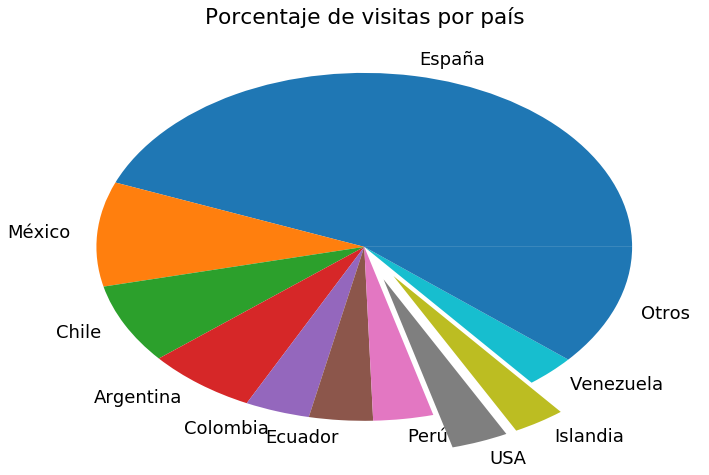

In [39]:
plt.figure(figsize=(12,8))
visitas = [43.97, 9.70, 7.42, 6.68, 3.91, 3.85, 3.62, 3.43, 3.16, 3.04] # Definimos un vector con el % de visitas del top ten de países
visitas = np.append(visitas, 100. - np.sum(visitas)) # Introducimos un último elemento que recoge el % de visitas de otros países fuera del top ten
paises = [u'España', u'México', 'Chile', 'Argentina', 'Colombia', 'Ecuador', u'Perú', 'USA', 'Islandia', 'Venezuela', 'Otros']  # Etiquetas para los quesitos
explode = [0, 0, 0, 0, 0, 0, 0, 0.2, 0.2, 0, 0]  # Esto nos ayudará a destacar algunos quesitos
plt.pie(visitas, labels = paises, explode = explode)  # Dibuja un gráfico de quesitos
plt.title(u'Porcentaje de visitas por país')

### [7.2](#Index) Campos vectoriales

Por último por hoy vamos a dibujar gráficos de flechas. Esto se suele usar para dibujar viento, el movimiento de un fluido, movimiento de partículas, … En este caso vamos usar plt.quiver (echadle un ojo también a plt.quiverkey y a plt.barbs). Vamos a dibujar flechas de un viento un poco loco en las latitudes y longitudes de la Península Ibérica (no voy a usar un mapa por debajo, si queréis completar el ejemplo usando un mapa podéis echarle un ojo a [este ejemplo](http://pybonacci.wordpress.com/2012/04/14/ejemplo-de-uso-de-basemap-y-netcdf4/)):

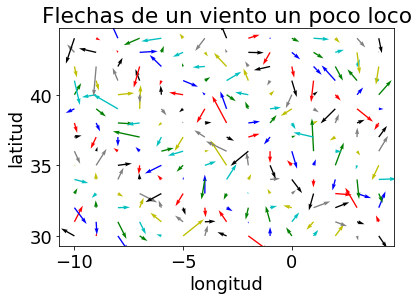

In [40]:
lon = np.arange(15) - 10.  # Creamos un vector de longitudes
lat = np.arange(15) + 30.  # Creamos un vector de latitudes
lon, lat = np.meshgrid(lon, lat)  # Creamos un array 2D para las longitudes y latitudes
u = np.random.randn(15 * 15)  # Componente x del vector viento que partirá desde una lon y una lat determinada
v = np.random.randn(15 * 15)  # Componente y del vector viento que partirá desde una lon y una lat determinada
colores = ['k','r','b','g','c','y','gray']  #  Definimos una serie de colores para las flechas
plt.title('Flechas de un viento un poco loco')  # Colocamos un título
plt.xlabel('longitud')  # Colocamos la etiqueta para el efe x
plt.ylabel('latitud')  # Colocamos la etiqueta para el eje y
plt.quiver(lon, lat, u, v, color = colores)  # Dibujamos las flechas 'locas'

# [8.](#Index) Texto y anotaciones

Hasta ahora hemos visto como configurar las ventanas, manejo de las mismas, definir áreas de gráfico, algunos tipos de gráficos… En esta ocasión nos interesa ver como podemos meter anotaciones, tablas,…, en nuestros gráficos.

A lo largo de las anteriores entregas del tutorial hemos podido ver algunas formas de tener anotaciones típicas para el título, los ejes, leyenda,… (`title`, `suptitle`, `xlabel`, `ylabel`, `figtext`, `legend`,…). En este caso vamos a revisar las posibilidades de escribir texto personalizado mediante el uso de [`plt.text`](http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.text), [`plt.arrow`](http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.arrow), [`plt.annotate`](http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.annotate) y [`plt.table`](http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.table).

Como caso sencillo para anotar texto en nuestro gráfico podemos usar `plt.text`. En el siguiente ejemplo vamos a resaltar donde está el valor máximo y el valor mínimo de una serie de datos:

Text(2,0.991059,'Máximo')

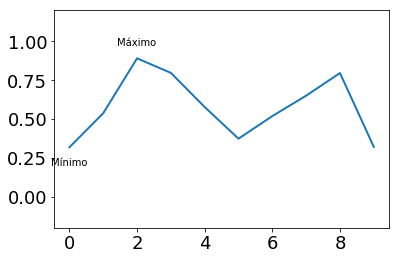

In [41]:
a = np.random.rand(10)  # Creamos una serie de 10 valores pseudo-aleatorios entre 0 y 1
plt.plot(a)  # Los dibujamos
plt.ylim(-0.2, 1.2)  # Definimos el rango de valores para el eje y
plt.text(np.argmin(a), np.min(a) - 0.1, u'Mínimo', 
         fontsize = 10, horizontalalignment='center',
         verticalalignment='center')  # Colocamos texto cerca del valor donde se encuentra el mínimo
plt.text(np.argmax(a), np.max(a) + 0.1, u'Máximo', 
         fontsize = 10, horizontalalignment='center',
         verticalalignment='center')  # Colocamos texto cerca del valor donde se encuentra el máximo

Lo que hemos hecho en `plt.text` es definir la posición del texto con un valor para la *x* y un valor para la *y* (en el sistema de referencia de los datos), la cadena de texto a mostrar, como queremos que sea la fuente, donde queremos que vaya colocado, si la queremos rotar, si la queremos en negrita,…

Al anterior ejemplo le podemos incluir una flecha que una el texto con la representación del valor máximo y del valor mínimo. Para ello podemos usar `plt.arrow` modificando ligeramente el anterior código:

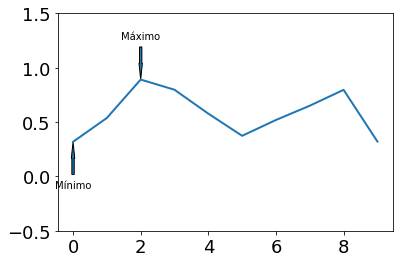

In [42]:
plt.plot(a)
plt.ylim(-0.5, 1.5)  # Extendemos un poco el rango del eje y
plt.text(np.argmax(a), np.max(a) + 0.4, u'Máximo', fontsize = 10, horizontalalignment='center', verticalalignment='center')  # Recolocamos el texto del máximo
plt.text(np.argmin(a), np.min(a) - 0.4, u'Mínimo', fontsize = 10, horizontalalignment='center', verticalalignment='center')  # Recolocamos el texto del mínimo
plt.arrow(np.argmax(a), np.max(a) + 0.3, 0, -0.3, length_includes_head = "True", shape = "full", width=0.07, head_width=0.1)  # Unimos el texto al valor representado
plt.arrow(np.argmin(a), np.min(a) - 0.3, 0, 0.3, length_includes_head = "True", shape = "full", width=0.07, head_width=0.1)  # Unimos el texto al valor representado

En `plt.arrow` hemos de definir el origen de la flecha, la distancia desde ese origen hasta el otro extremo de la flecha, si queremos que tenga cabecera, si queremos que la cabecera esté en el origen, el color de la flecha,…

Lo que hemos hecho con `plt.text` y con `plt.arrow` lo podemos hacer de forma más compacta y elegante con `plt.annotate`. Como anteriormente, hacemos uso de un ejemplo y vamos viendo las partes a modificar de `plt.annotate`:

Text(1,1.51846,'Mínimo')

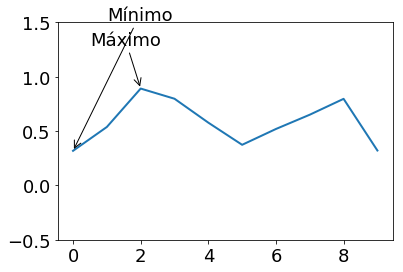

In [43]:
plt.plot(a)
plt.ylim(-0.5, 1.5)  # Extendemos un poco el rango del eje y
plt.annotate(u'Máximo', xy = (np.argmax(a), np.max(a)), 
             xycoords = 'data', xytext = (np.argmax(a) - 1.5, 
             np.max(a) + 0.4), textcoords = 'data', arrowprops = dict(arrowstyle = "->"))
plt.annotate(u'Mínimo', xy = (np.argmin(a), np.min(a)), 
             xycoords = 'data', xytext = (np.argmin(a) + 1, 
             np.min(a) + 1.2), textcoords = 'data', arrowprops = dict(arrowstyle = "->"))

En `plt.annotate` introducimos la cadena de caracteres a mostrar, indicamos hacia donde apuntará esa cadena de caracteres (*xy*, en este caso estamos usando el sistema de referencia de los datos, 'data', pero podemos usar píxeles, puntos,…), la posición del texto (*xytext*), y como se representará la flecha. Con `plt.annotate` podemos tener anotaciones elegantes de forma sencilla como puedes ver en estos enlaces [[1]](http://matplotlib.sourceforge.net/mpl_examples/pylab_examples/annotation_demo2_00.png), [[2]](http://matplotlib.sourceforge.net/mpl_examples/pylab_examples/annotation_demo2_01.png).

Por último, vamos a ver como podemos dibujar una tabla de forma sencilla. Con `plt.table` podemos meter rápidamente una tabla pero por defecto la mete debajo del eje *x*. Vamos a ver un [ejemplo que he encontrado en SO](http://stackoverflow.com/questions/8524401/how-can-i-place-a-table-on-a-plot-in-matplotlib) donde metemos la tabla dentro de los ejes.

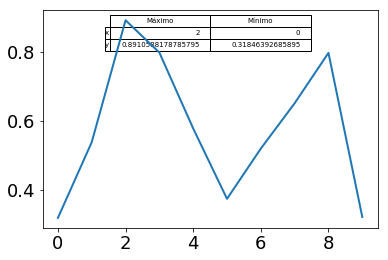

In [44]:
valores = [[np.argmax(a), np.argmin(a)], [np.max(a), np.min(a)]]
etiquetas_fil = ('x', 'y')
etiquetas_col = (u'Máximo', u'Mínimo')
plt.plot(a)
plt.table(cellText=valores, rowLabels=etiquetas_fil, colLabels = etiquetas_col, colWidths = [0.3]*len(a), loc='upper center')

Donde hemos definido los valores de las celdas internas (cellText), Las etiquetas de filas y columnas (rowLabels y colLabels), el ancho de las celdas y la localización de la tabla.

# [9.](#Index) Miscelánea

Después de dar un repaso por toda la librería, obviando algunas funciones estadísticas y eventos, vamos a acabar este tutorial viendo algunas funciones que sirven para leer y guardar imágenes.

### Leyendo imágenes externas, guardando gráficos,...

Imaginad que queréis usar una imagen de fondo, por ejemplo vuestro nombre, o las siglas de creative commons o una foto,…, en vuestros gráficos. Para el ejemplo que vamos a ver a continuación vamos a usar la imagen que está en [el siguiente enlace](http://images3.wikia.nocookie.net/__cb57524/es/images/1/13/Cc.large.png) como fondo (guárdala en local para poder leerla).

In [45]:
background = plt.imread('imgs/Cc.large.png')  # Leemos la imagen que queremos usar de fondo, lo que escribáis entre comillas es la ruta a la imagen
x = np.arange(background.shape[1])  # Definimos valores de x
y = np.random.rand(background.shape[0]) * background.shape[0]  # Definimos valores de y
plt.plot(x, y)  # Dibujamos la serie
plt.imshow(background, alpha = 0.25)  # Creamos el fondo con una transparencia del 0.10 (1 es opaco y 0 es transparente)

FileNotFoundError: [Errno 2] No such file or directory: 'imgs/Cc.large.png'

Con [`plt.imread`](http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.imread) lo que hacemos es leer una imagen y convertirla en un *numpy array* que más tarde podemos utilizar como queramos (en este caso, como fondo para la imagen). Con [`plt.imshow`](http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.imshow) lo que hemos hecho es mostrar la imagen en pantalla. Por último, que sepáis que también existe [`plt.imsave`](http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.imsave), que permite guardar un *numpy array* como una imagen.

Por último, pero no por ello menos importante, quedaría el uso [`plt.savefig`](http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.savefig), que nos permite guardar cualquiera de las figuras que hemos ido creando a lo largo de todo el tutorial. Para el anterior caso, solo tenemos que añadir lo siguiente al código de más arriba:

In [ ]:
plt.savefig('imgs/imagen_con_fondo_cc.png')

La función [`plt.savefig`] permite definir la resolución de la imagen, el formato de salida (por defecto, `matplotlib` solo permite los formatos *png*, *eps*, *ps*, *png* y *svg*, si queremos usar otros formatos haría falta instalar otras librerías (o bibliotecas) como [PIL](http://www.pythonware.com/products/pil/)), la orientación de la figura,…

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
from scipy.integrate import odeint

Ahora inicializamos la figura que se usará en la animación.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax = Axes3D(fig)
ax.azim = 45
ax.elev = 45
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_xticklabels('')
ax.set_yticklabels('')
ax.set_zticklabels('')
linea, = ax.plot([], [], [], label = 'Lorenz', lw = 0.5)
ax.legend()
ax.set_xlim(-20,20)
ax.set_ylim(-30,30)
ax.set_zlim(0,50)